In [15]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import( accuracy_score,
                           confusion_matrix,
                           classification_report,
                          roc_auc_score,
                          roc_curve,
                          auc)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import hvplot.pandas

In [16]:
data_path = os.path.join('..', 'data', 'processed_data', 'features.csv')

In [17]:
data = pd.read_csv(data_path, sep=",")

In [18]:
data.head(15)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,100000,36,11.44,3294.8,117000.0,0,26.24,160,0,36369.0,...,1,0,1,1,0,0,0,0,0,1
1,80000,36,11.99,2656.8,65000.0,0,22.05,170,0,20131.0,...,0,0,0,1,0,1,0,0,0,0
2,156000,36,10.49,5069.7,43057.0,0,12.79,130,0,11987.0,...,0,0,0,1,0,0,0,0,0,1
3,72000,36,6.49,2206.5,54000.0,0,0.26,60,0,5472.0,...,0,0,0,1,0,0,0,0,0,1
4,243750,60,17.27,6093.3,55000.0,1,33.95,130,0,24584.0,...,0,0,0,1,0,1,0,0,0,0
5,200000,36,13.33,6770.7,86788.0,0,16.31,80,0,25757.0,...,0,0,0,1,0,1,0,0,0,0
6,180000,36,5.32,5420.7,125000.0,0,1.36,80,0,4178.0,...,0,0,0,1,0,1,0,0,0,0
7,130000,36,11.14,4264.7,46000.0,0,26.87,110,0,13425.0,...,0,0,0,1,0,0,0,0,0,1
8,189000,60,10.99,4108.4,103000.0,0,12.52,130,0,18637.0,...,0,0,1,1,0,0,0,0,0,1
9,263000,36,16.29,928.4,115000.0,0,23.69,130,0,22171.0,...,0,0,0,1,0,1,0,0,0,0


In [19]:
data.describe()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
count,395219.000000,395219.000000,395219.000000,395219.000000,3.952190e+05,395219.000000,395219.000000,395219.000000,395219.000000,3.952190e+05,...,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000
mean,141220.612496,41.706527,12.504758,3933.446589,7.781316e+04,0.196152,15.631947,113.184943,1.784808,1.585165e+04,...,0.006179,0.004539,0.399457,0.998201,0.001075,0.501044,0.000073,0.000278,0.095289,0.403308
std,83570.549442,10.217263,5.398899,2641.281800,8.127153e+04,0.397085,9.252182,51.349013,5.310979,2.058427e+04,...,0.078363,0.067221,0.489787,0.042377,0.032775,0.500000,0.008566,0.016681,0.293614,0.490562
min,5000.000000,36.000000,0.600000,28.500000,0.000000e+00,0.000000,0.000000,10.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80000.000000,36.000000,9.670000,1994.400000,4.500000e+04,0.000000,8.820000,80.000000,0.000000,6.038000e+03,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120000.000000,36.000000,12.990000,3449.500000,6.473000e+04,0.000000,15.530000,100.000000,0.000000,1.119000e+04,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,200000.000000,36.000000,15.880000,5392.100000,9.000000e+04,0.000000,22.110000,140.000000,0.000000,1.962600e+04,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,400000.000000,60.000000,30.990000,15338.100000,8.706582e+06,1.000000,999.900000,900.000000,860.000000,1.743266e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
print("Colonnes disponibles:", data.columns.tolist())

Colonnes disponibles: ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'credit_history_length', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpos

In [22]:
X=data.drop('loan_status', axis=1)
y=data.loan_status

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316175, 71)
(79044, 71)
(316175,)
(79044,)


In [15]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix_model(model, X_test, y_test, model_name="Modèle"):
    """
    Affiche la matrice de confusion pour un modèle donné.
    
    Paramètres :
    - model : modèle entraîné (doit implémenter predict)
    - X_test : données de test
    - y_test : étiquettes vraies
    - model_name : nom du modèle pour le titre (str)
    """
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        cmap='Blues',
        display_labels=['Fully Paid', 'Charged Off'],
        values_format='d'
    )
    plt.title(f"Matrice de confusion – {model_name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion(model, X_test, y_test, name="Modèle"):
    """
    Affiche la matrice de confusion d’un modèle sklearn-compatible (y compris LGBM).
    Compatible avec sklearn ≥ 1.3
    """
    try:
        # Privilégier from_estimator (plus propre)
        ConfusionMatrixDisplay.from_estimator(
            model,
            X_test,
            y_test,
            cmap='Blues',
            values_format='d',
            display_labels=['Fully-Paid', 'Default']
        )
    except Exception as e:
        # Fallback : calcul manuel + from_predictions
        y_pred = model.predict(X_test)
        y_pred = np.round(y_pred).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Fully-Paid', 'Default']).plot(
            cmap='Blues',
            values_format='d'
        )
    plt.title(f"Matrice de confusion – {name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

## LGBM

In [34]:
params_lgbm = {
    # Contrôle de l'overfitting
    'max_depth': 6,           # Profondeur maximale de l'arbre (-1 = pas de limite)
    'min_child_samples': 20,    # Nombre minimal de données dans une feuille
    'subsample': 0.8,          # % d'échantillons utilisés pour chaque arbre
    'colsample_bytree': 0.8,   # % de features utilisées pour chaque arbre
    
    # Apprentissage
    'learning_rate': 0.05,     # Taux d'apprentissage (eta)
    'n_estimators': 2000,      # Nombre d'arbres (augmentez si underfitting)
    'num_leaves': 50,          # Nombre maximal de feuilles par arbre
    
    # Régularisation
    'reg_alpha': 0.5,          # L1 regularization
    'reg_lambda': 0.5,         # L2 regularization
    
    # Performances
    'random_state': 42,        # Reproductibilité
    'boosting_type': 'gbdt',   # Type d'algorithme (gbdt, dart, goss)
    
    # Gestion des classes déséquilibrées
    'class_weight': 'balanced',
    #'is_unbalance': True,      # Ajuste automatiquement les poids
    #'scale_pos_weight': scale_pos_weight,  # Alternative pour déséquilibre de classes
    'metric': ['auc', 'binary_logloss', 'f1']
}

In [37]:
params_lgbm = {
    'max_depth': -1,           # Enlève la limite (au lieu de 6)
    'min_child_samples': 100,  # Augmente (au lieu de 20)
    'num_leaves': 31,          # Réduis (au lieu de 50)
    'subsample': 0.9,          # Plus proche de 1
    'learning_rate': 0.1,      # Plus agressif
    'n_estimators': 1000,      # Early stopping fera le job
    'reg_alpha': 0.1,          # Moins de régularisation
    'reg_lambda': 0.1,
    'scale_pos_weight': 4.1,   # Ton ratio semble bon
    'objective': 'binary',
    'metric': 'binary_logloss'
}

In [48]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X_train, y_train)

model = LGBMClassifier(**params_lgbm)  # Paramètres ci-dessus
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 62018, number of negative: 254157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 316175, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196151 -> initscore=-1.410528
[LightGBM] [Info] Start training from score -1.410528


LGBMClassifier(metric='binary_logloss', min_child_samples=100,
               n_estimators=1000, objective='binary', reg_alpha=0.1,
               reg_lambda=0.1, scale_pos_weight=4.1, subsample=0.9)

In [26]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
scale_pos_weight

4.098116675803799

In [49]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# y_pred_class = (y_test_pred > 0.6).astype(int)
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 71.44%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.919949      0.383174  0.714358       0.651562       0.814660
recall          0.706099      0.748202  0.714358       0.727151       0.714358
f1-score        0.798962      0.506802  0.714358       0.652882       0.741654
support    254157.000000  62018.000000  0.714358  316175.000000  316175.000000
_______________________________________________
Confusion Matrix: 
 [[179460  74697]
 [ 15616  46402]]

Test Result:
Accuracy Score: 67.19%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.883676      0.326366  0.671854      0.605021      0.774356
recall         0.681487      0.632377  0.671854      0.656932      0.671854
f1-score       0.769522      0.430535  0.671854      0.600

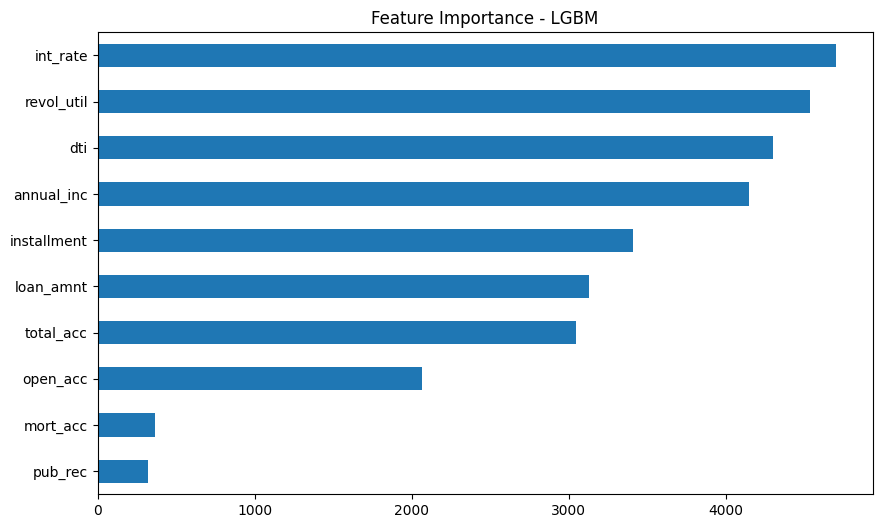

In [40]:
# lgbm_clf
importances_lgbm = model.feature_importances_
feature_names = X.columns.tolist()

# Affichage
pd.Series(importances_lgbm, index=feature_names).sort_values(ascending=False).head(20).plot.barh(figsize=(10,6))
plt.title("Feature Importance - LGBM")
plt.gca().invert_yaxis()
plt.show()

In [10]:
params_lgbm = {
    # Contrôle de l'overfitting
    'max_depth': 6,           # Profondeur maximale de l'arbre (-1 = pas de limite)
    'min_child_samples': 100,    # Nombre minimal de données dans une feuille
    'subsample': 0.8,          # % d'échantillons utilisés pour chaque arbre
    'colsample_bytree': 0.8,   # % de features utilisées pour chaque arbre
    
    # Apprentissage
    'learning_rate': 0.001,     # Taux d'apprentissage (eta)
    'n_estimators': 1000,      # Nombre d'arbres (augmentez si underfitting)
    'num_leaves': 25,          # Nombre maximal de feuilles par arbre
    
    # Régularisation
    'reg_alpha': 0.3,          # L1 regularization
    'reg_lambda': 0.3,         # L2 regularization
    
    # Performances
    'random_state': 42,        # Reproductibilité
    'boosting_type': 'gbdt',   # Type d'algorithme (gbdt, dart, goss)
    
    # Gestion des classes déséquilibrées
    'class_weight': 'balanced',
    # 'is_unbalance': True,      # Ajuste automatiquement les poids
    # 'scale_pos_weight': 1.0  # Alternative pour déséquilibre de classes
    'metric': ['auc', 'binary_logloss']
}
params_lgbm_optimized = {
    # Contrôle de l'overfitting
    'max_depth': 10,           # Profondeur maximale de l'arbre (-1 = pas de limite)
    'min_child_samples': 10,    # Nombre minimal de données dans une feuille
    'subsample': 0.870,          # % d'échantillons utilisés pour chaque arbre
    'colsample_bytree': 0.882,   # % de features utilisées pour chaque arbre
    
    # Apprentissage
    'learning_rate': 0.057,     # Taux d'apprentissage (eta)
    'n_estimators': 700,      # Nombre d'arbres (augmentez si underfitting)
    'num_leaves': 25,          # Nombre maximal de feuilles par arbre
    
    # Régularisation
    'reg_alpha': 0.424,          # L1 regularization
    'reg_lambda': 0.360,         # L2 regularization
    
    # Performances
    'random_state': 42,        # Reproductibilité
    'boosting_type': 'gbdt',   # Type d'algorithme (gbdt, dart, goss)
    
    # Gestion des classes déséquilibrées
    'class_weight': 'balanced',
    #'is_unbalance': True,      # Ajuste automatiquement les poids
    # 'scale_pos_weight': 1.0  # Alternative pour déséquilibre de classes
    'metric': ['auc', 'binary_logloss', 'average_precision']
}
lgbm_clf = LGBMClassifier(**params_lgbm)

lgbm_clf.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 62018, number of negative: 254157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2316
[LightGBM] [Info] Number of data points in the train set: 316175, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.001, max_depth=6,
               metric=['auc', 'binary_logloss'], min_child_samples=100,
               n_estimators=1000, num_leaves=25, random_state=42, reg_alpha=0.3,
               reg_lambda=0.3, subsample=0.8)

In [11]:
y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)


Train Result:
Accuracy Score: 64.12%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.886134      0.308051  0.641173       0.597092       0.772743
recall          0.635241      0.665484  0.641173       0.650363       0.641173
f1-score        0.740000      0.421151  0.641173       0.580576       0.677458
support    254157.000000  62018.000000  0.641173  316175.000000  316175.000000
_______________________________________________
Confusion Matrix: 
 [[161451  92706]
 [ 20746  41272]]

Test Result:
Accuracy Score: 64.13%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.885437      0.307655  0.641288      0.596546      0.772101
recall         0.636050      0.662754  0.641288      0.649402      0.641288
f1-score       0.740305      0.420235  0.641288      0.580

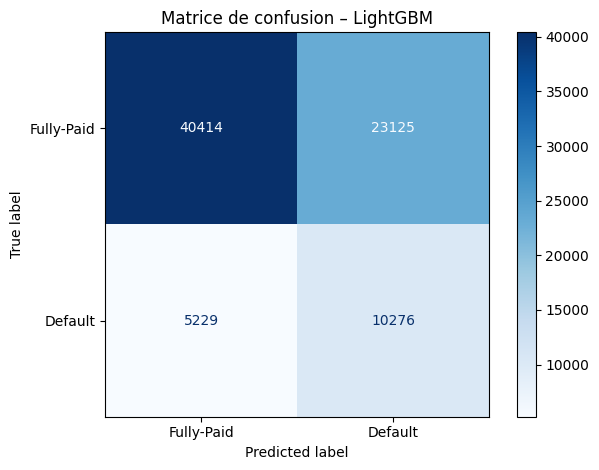

In [12]:
#plot_confusion_matrix(lgbm_clf, X_test, y_test, cmap='Blues', values_format='d')
plot_confusion(lgbm_clf, X_test, y_test, name="LightGBM")
#plot_roc_curve(lgbm_clf, X_test, y_test)


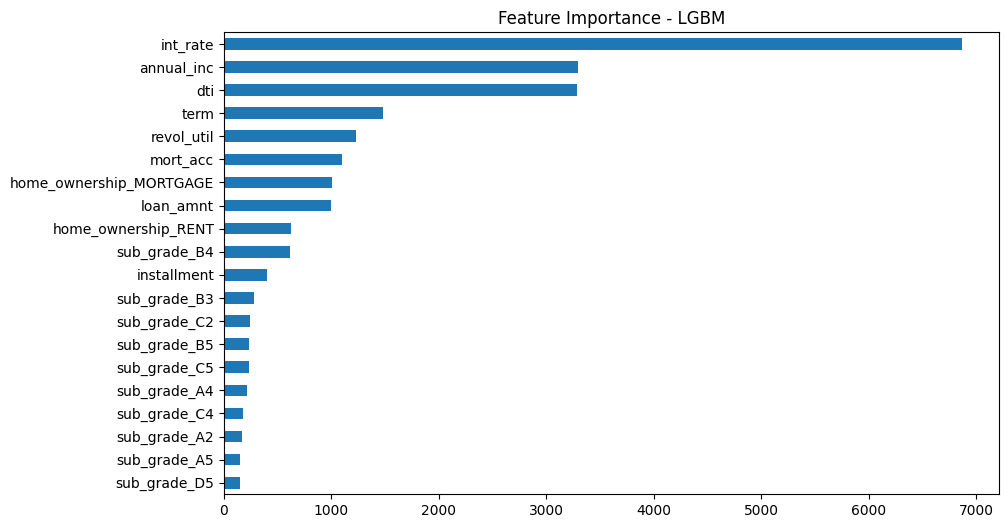

In [13]:
# lgbm_clf
importances_lgbm = lgbm_clf.feature_importances_
feature_names = X.columns.tolist()

# Affichage
pd.Series(importances_lgbm, index=feature_names).sort_values(ascending=False).head(20).plot.barh(figsize=(10,6))
plt.title("Feature Importance - LGBM")
plt.gca().invert_yaxis()
plt.show()

In [14]:
scores_dict = {
    'LightGBM': {
        'Train': roc_auc_score(y_train, lgbm_clf.predict_proba(X_train)[:, 1]),
        'Test': roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1]),
    },
}

## XGboost

In [15]:
params_xgb = {
    "n_estimators": 300,
    "learning_rate": 0.1,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "scale_pos_weight": 3,  # ajusté selon le ratio fully_paid / default
    "use_label_encoder": False,
    "eval_metric": 'logloss',
    "random_state": 42
}
params_xgb_optimized = {
    "n_estimators": 200,
    "learning_rate": 0.104,
    "max_depth": 5,
    "subsample": 0.891,
    "colsample_bytree": 0.803,
    "scale_pos_weight": 2,  # ajusté selon le ratio fully_paid / default
    "use_label_encoder": False,
    "eval_metric": 'logloss',
    "random_state": 42
}

xgb_clf = XGBClassifier(**params_xgb)
xgb_clf.fit(X_train, y_train)
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

c:\Users\admin\OneDrive\Bureau\credit_pour_tous\venv_chat\lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Result:
Accuracy Score: 75.55%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.885610      0.411994  0.755493       0.648802       0.792710
recall          0.799038      0.577042  0.755493       0.688040       0.755493
f1-score        0.840099      0.480746  0.755493       0.660423       0.769612
support    254157.000000  62018.000000  0.755493  316175.000000  316175.000000
_______________________________________________
Confusion Matrix: 
 [[203081  51076]
 [ 26231  35787]]

Test Result:
Accuracy Score: 73.31%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.870250      0.371352  0.733123      0.620801      0.772388
recall         0.785045      0.520348  0.733123      0.652697      0.733123
f1-score       0.825455      0.433402  0.733123      0.629

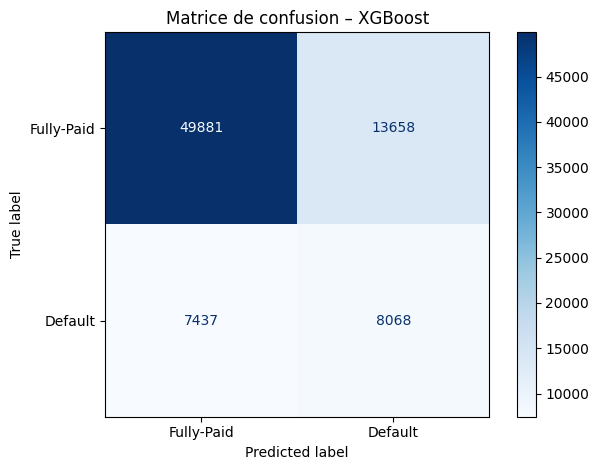

In [16]:
#disp = plot_confusion_matrix(xgb_clf, X_test, y_test, 
#                             cmap='Blues', values_format='d', 
#                             display_labels=['Fully-Paid', 'Default'])
plot_confusion(xgb_clf, X_test, y_test, name="XGBoost")
# disp = plot_roc_curve(xgb_clf, X_test, y_test)

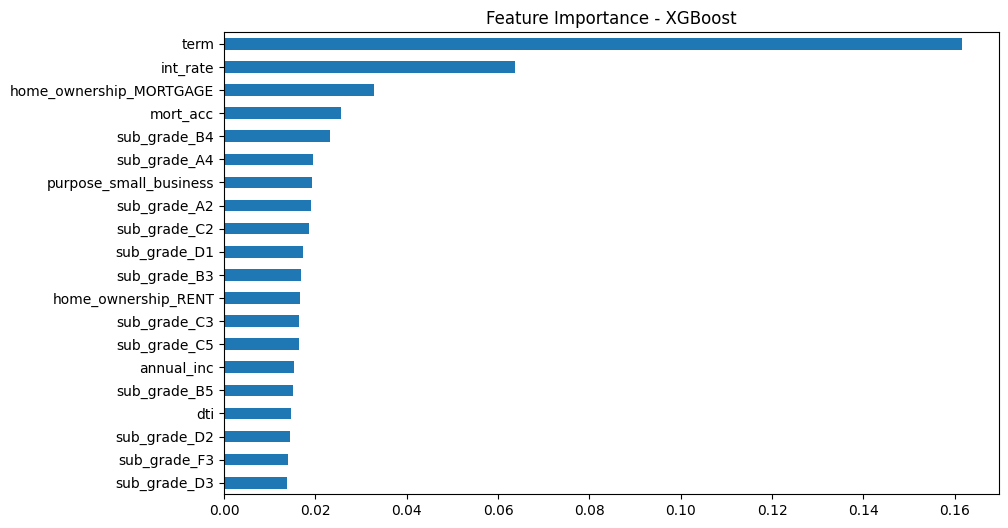

In [17]:
# xgb_clf
importances_xgb = xgb_clf.feature_importances_
feature_names = X.columns.tolist()

# Affichage
pd.Series(importances_xgb, index=feature_names).sort_values(ascending=False).head(20).plot.barh(figsize=(10,6))
plt.title("Feature Importance - XGBoost")
plt.gca().invert_yaxis()
plt.show()

In [18]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict_proba(X_train)[:, 1]),
        'Test': roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]),
    }

## Random Forest

In [ ]:
params_rf = {
    'n_estimators': 200,
    'max_depth': 15,
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'class_weight': 'balanced_subsample',
    'random_state': 42
}
params_rf_optimized = {
    'n_estimators': 300,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'class_weight': 'balanced_subsample',
    'random_state': 42
}

rf_clf = RandomForestClassifier(**params_rf)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 69.74%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.902460      0.358923  0.697402       0.630691       0.795844
recall          0.699127      0.690332  0.697402       0.694729       0.697402
f1-score        0.787886      0.472289  0.697402       0.630088       0.725981
support    254157.000000  62018.000000  0.697402  316175.000000  316175.000000
_______________________________________________
Confusion Matrix: 
 [[177688  76469]
 [ 19205  42813]]

Test Result:
Accuracy Score: 67.09%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.881111      0.323751  0.670892      0.602431      0.771782
recall         0.682699      0.622509  0.670892      0.652604      0.670892
f1-score       0.769318      0.425968  0.670892      0.597

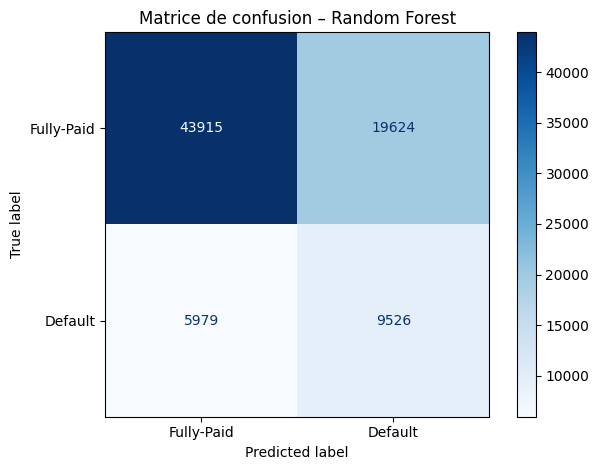

In [20]:
# disp = plot_confusion_matrix(rf_clf, X_test, y_test, 
#                              cmap='Blues', values_format='d', 
#                              display_labels=['Fully-Paid', 'Default'])
plot_confusion(rf_clf, X_test, y_test, name="Random Forest")
# disp = plot_roc_curve(xgb_clf, X_test, y_test)


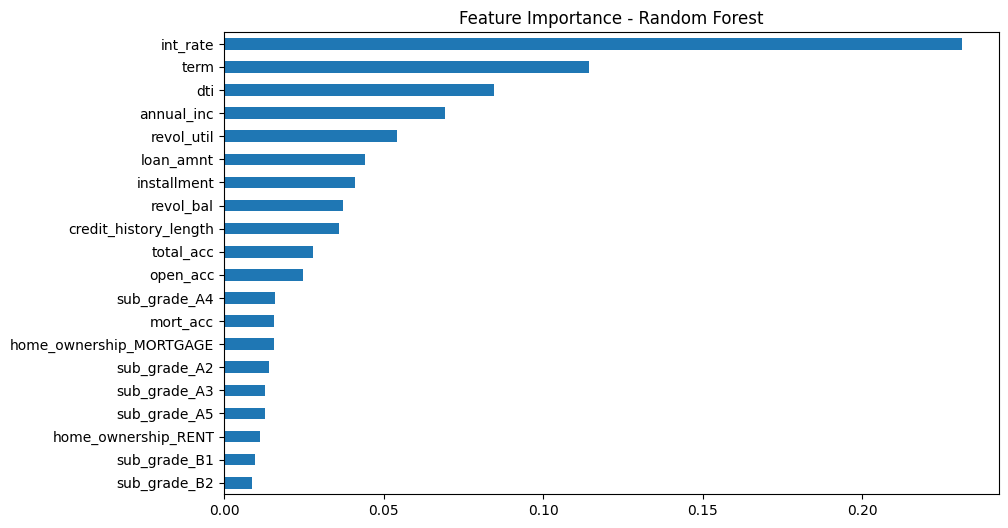

In [21]:
# rf
importances_rf = rf_clf.feature_importances_
feature_names = X.columns.tolist()

# Affichage
pd.Series(importances_rf, index=feature_names).sort_values(ascending=False).head(20).plot.barh(figsize=(10,6))
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [22]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:, 1]),
        'Test': roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]),
    }

# Comparaison des performances des modèles

In [23]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'LGBM': lgbm_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict_proba(X_test)[:, 1]):.3f}")

RANDOM FOREST                  roc_auc_score: 0.710
XGBOOST                        roc_auc_score: 0.722
LGBM                           roc_auc_score: 0.705


In [28]:
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh()

:Bars   [index,Variable]   (value)

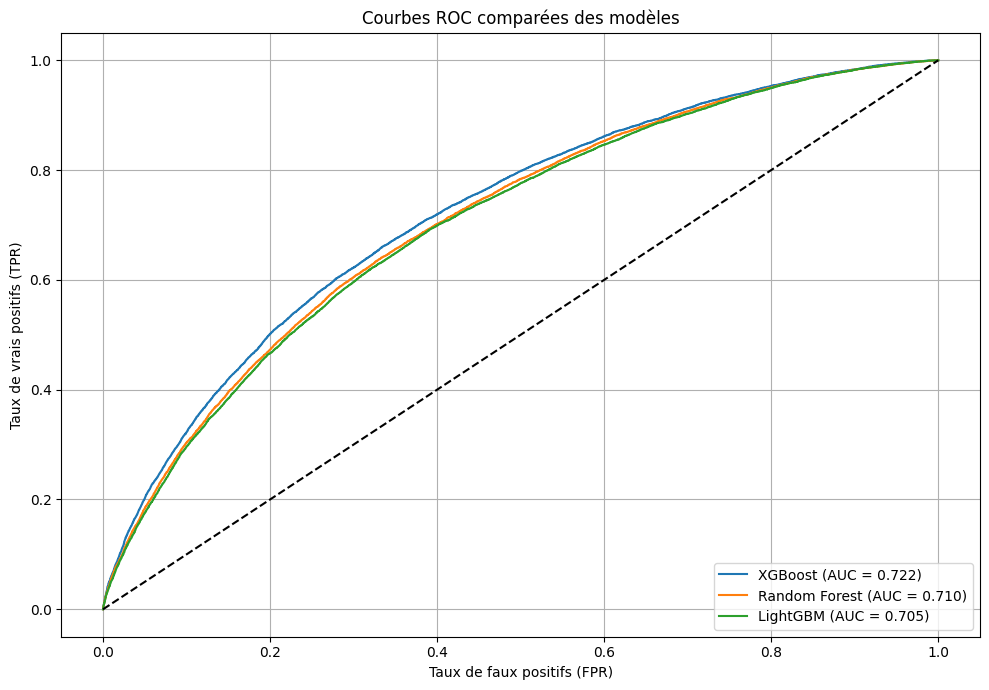

In [29]:
# Prédictions probabilistes
xgb_probs = xgb_clf.predict_proba(X_test)[:, 1]
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
lgbm_probs = lgbm_clf.predict_proba(X_test)[:, 1]

# Courbes ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, lgbm_probs)

# AUCs
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_rf = auc(fpr_rf, tpr_rf)
auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# Tracé ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_lgbm, tpr_lgbm, label=f"LightGBM (AUC = {auc_lgbm:.3f})")

# Diagonale aléatoire
plt.plot([0, 1], [0, 1], 'k--')

plt.title("Courbes ROC comparées des modèles")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optimisation des hyperparamètres

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [32]:
# 3. LightGBM
lgbm_params = {
    'n_estimators': [300, 500, 700],
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': [5, 7, 10],
    'num_leaves': [15, 25, 31, 40],
    'min_child_samples': [10, 20, 50, 100],
    'subsample': uniform(0.8, 0.3),
    'colsample_bytree': uniform(0.8, 0.3),
    'reg_alpha': uniform(0.0, 0.5),
    'reg_lambda': uniform(0.0, 0.5),
    'class_weight': ['balanced']
}

lgbm_random = RandomizedSearchCV(
    LGBMClassifier(random_state=42, metric=['auc', 'binary_logloss', 'average_precision']),
    lgbm_params,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
lgbm_random.fit(X_train, y_train)
print("\nBest LGBM Params:", lgbm_random.best_params_)
lgbm_best = lgbm_random.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\admin\OneDrive\Bureau\credit_pour_tous\venv_chat\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\admin\OneDrive\Bureau\credit_pour_tous\venv_chat\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\admin\OneDrive\Bureau\credit_pour_tous\venv_chat\lib\site-packages\lightgbm\sklearn.py", line 1560, in fit
    super().fit(
  File "c:\Users\admin\OneDrive\Bureau\credit_pour_tous\venv_chat\lib\site-packages\lightgbm\sklearn.py

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 62018, number of negative: 254157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 316175, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Best LGBM Params: {'class_weight': 'balanced', 'colsample_bytree': 0.9411016230697342, 'learning_rate': 0.028657005888603586, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 700, 'num_leaves': 40, 'reg_alpha': 0.40372007758203127, 'reg_lambda': 0.4480456499617466, 'subsample': 0.7954010424915591}


Best LGBM Params: {'class_weight': 'balanced', 'colsample_bytree': np.float64(0.8135681866731614), 'learning_rate': np.float64(0.042533033076326436), 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 700, 'num_leaves': 15, 'reg_alpha': np.float64(0.2933755828319241), 'reg_lambda': np.float64(0.482627653632069), 'subsample': np.float64(0.9821102743060055)}

In [26]:
# 2. XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': [3, 5, 7, 9],
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'scale_pos_weight': [1, 2, 3, 4, 5]
}

xgb_random = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    xgb_params,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
xgb_random.fit(X_train, y_train)
print("\nBest XGB Params:", xgb_random.best_params_)
xgb_best = xgb_random.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:04:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:04:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:05:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:05:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages

Best XGB Params: {'colsample_bytree': 0.7975990992289792, 'learning_rate': 0.0877354579378964, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 0.8760253496991544}


In [32]:
# 1. Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
rf_random.fit(X_train, y_train)
print("\nBest RF Params:", rf_random.best_params_)
rf_best = rf_random.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
/root/venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(

Best RF Params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'class_weight': 'balanced_subsample'}


Best RF Params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'class_weight': 'balanced_subsample'}

# Optimisons les hyperparamètres

In [12]:
params_lgbm_optimized = {
    # Contrôle de l'overfitting
    'max_depth': 5,           # Profondeur maximale de l'arbre (-1 = pas de limite)
    'min_child_samples': 20,    # Nombre minimal de données dans une feuille
    'subsample': 0.982,          # % d'échantillons utilisés pour chaque arbre
    'colsample_bytree': 0.813,   # % de features utilisées pour chaque arbre
    
    # Apprentissage
    'learning_rate': 0.042,     # Taux d'apprentissage (eta)
    'n_estimators': 700,      # Nombre d'arbres (augmentez si underfitting)
    'num_leaves': 15,          # Nombre maximal de feuilles par arbre
    
    # Régularisation
    'reg_alpha': 0.293,          # L1 regularization
    'reg_lambda': 0.482,         # L2 regularization
    
    # Performances
    'random_state': 42,        # Reproductibilité
    'boosting_type': 'gbdt',   # Type d'algorithme (gbdt, dart, goss)
    
    # Gestion des classes déséquilibrées
    'class_weight': 'balanced',
    #'is_unbalance': True,      # Ajuste automatiquement les poids
    # 'scale_pos_weight': 1.0  # Alternative pour déséquilibre de classes
    'metric': ['auc', 'binary_logloss', 'average_precision']
}
lgbm_clf = LGBMClassifier(**params_lgbm_optimized)

lgbm_clf.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 62018, number of negative: 254157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 316175, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(class_weight='balanced', colsample_bytree=0.813,
               learning_rate=0.042, max_depth=5,
               metric=['auc', 'binary_logloss', 'average_precision'],
               n_estimators=700, num_leaves=15, random_state=42,
               reg_alpha=0.293, reg_lambda=0.482, subsample=0.982)

In [13]:
y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)


Train Result:
Accuracy Score: 66.66%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.896005      0.330981  0.666606       0.613493       0.785175
recall          0.662099      0.685075  0.666606       0.673587       0.666606
f1-score        0.761495      0.446327  0.666606       0.603911       0.699674
support    254157.000000  62018.000000  0.666606  316175.000000  316175.000000
_______________________________________________
Confusion Matrix: 
 [[168277  85880]
 [ 19531  42487]]

Test Result:
Accuracy Score: 66.14%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.889581      0.323192  0.661353      0.606387      0.778480
recall         0.660728      0.663915  0.661353      0.662321      0.661353
f1-score       0.758263      0.434750  0.661353      0.596

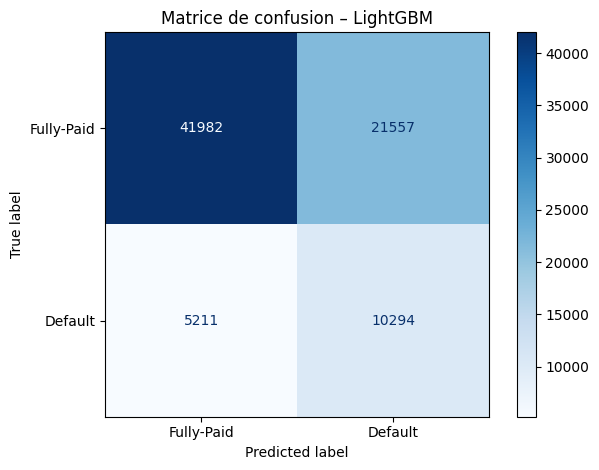

In [35]:
plot_confusion(lgbm_clf, X_test, y_test, name="LightGBM")

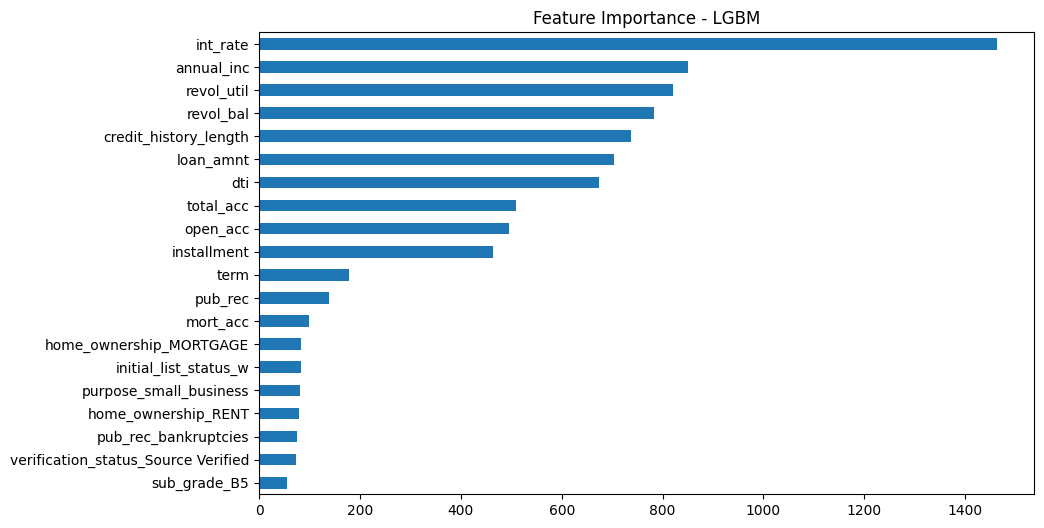

In [37]:
# lgbm_clf
importances_lgbm = lgbm_clf.feature_importances_
feature_names = X.columns.tolist()

# Affichage
pd.Series(importances_lgbm, index=feature_names).sort_values(ascending=False).head(20).plot.barh(figsize=(10,6))
plt.title("Feature Importance - LGBM")
plt.gca().invert_yaxis()
plt.show()

In [38]:
params_xgb_optimized = {
    "n_estimators": 300,
    "learning_rate": 0.087,
    "max_depth": 5,
    "subsample": 0.876,
    "colsample_bytree": 0.797,
    "scale_pos_weight": 5,  # ajusté selon le ratio fully_paid / default
    "use_label_encoder": False,
    "eval_metric": 'logloss',
    "random_state": 42
}

xgb_clf = XGBClassifier(**params_xgb_optimized)
xgb_clf.fit(X_train, y_train)
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

c:\Users\admin\OneDrive\Bureau\credit_pour_tous\venv_chat\lib\site-packages\xgboost\training.py:183: UserWarning: [23:13:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [39]:
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 62.15%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.912925      0.312002  0.621513       0.612464       0.795054
recall          0.584949      0.771357  0.621513       0.678153       0.621513
f1-score        0.713031      0.444294  0.621513       0.578662       0.660318
support    254157.000000  62018.000000  0.621513  316175.000000  316175.000000
_______________________________________________
Confusion Matrix: 
 [[148669 105488]
 [ 14180  47838]]

Test Result:
Accuracy Score: 60.96%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.900343      0.299210  0.609648      0.599776      0.782427
recall         0.578416      0.737633  0.609648      0.658025      0.609648
f1-score       0.704338      0.425729  0.609648      0.565

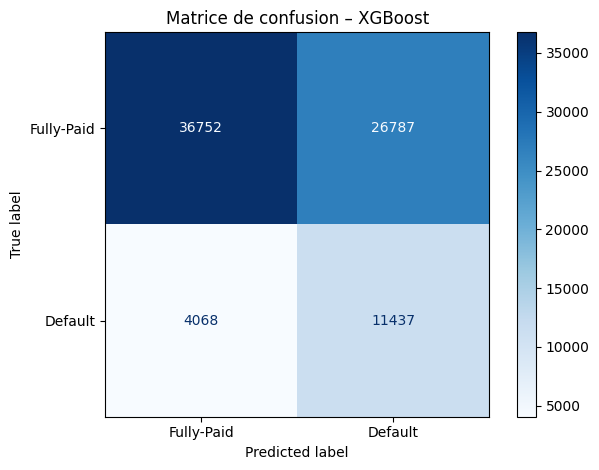

In [40]:
plot_confusion(xgb_clf, X_test, y_test, name="XGBoost")

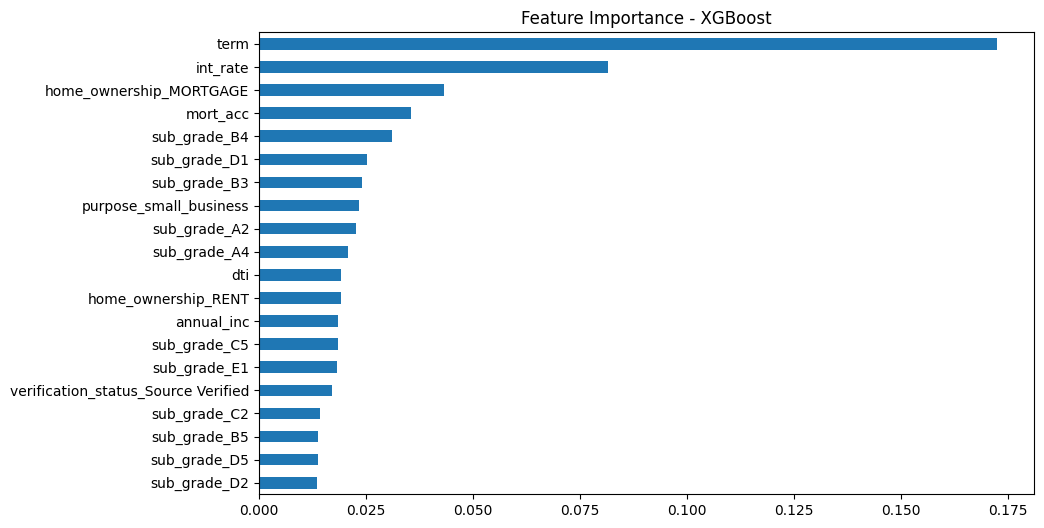

In [41]:
# xgb_clf
importances_xgb = xgb_clf.feature_importances_
feature_names = X.columns.tolist()

# Affichage
pd.Series(importances_xgb, index=feature_names).sort_values(ascending=False).head(20).plot.barh(figsize=(10,6))
plt.title("Feature Importance - XGBoost")
plt.gca().invert_yaxis()
plt.show()

In [42]:
params_rf_optimized = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'class_weight': 'balanced_subsample',
    'random_state': 42
}

rf_clf = RandomForestClassifier(**params_rf_optimized)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 97.37%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.983872      0.932045  0.973685       0.957958       0.973706
recall          0.983384      0.933939  0.973685       0.958661       0.973685
f1-score        0.983628      0.932991  0.973685       0.958309       0.973696
support    254157.000000  62018.000000  0.973685  316175.000000  316175.000000
_______________________________________________
Confusion Matrix: 
 [[249934   4223]
 [  4097  57921]]

Test Result:
Accuracy Score: 78.85%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.836515      0.436128  0.788535      0.636321      0.757976
recall         0.915941      0.266430  0.788535      0.591186      0.788535
f1-score       0.874428      0.330784  0.788535      0.602

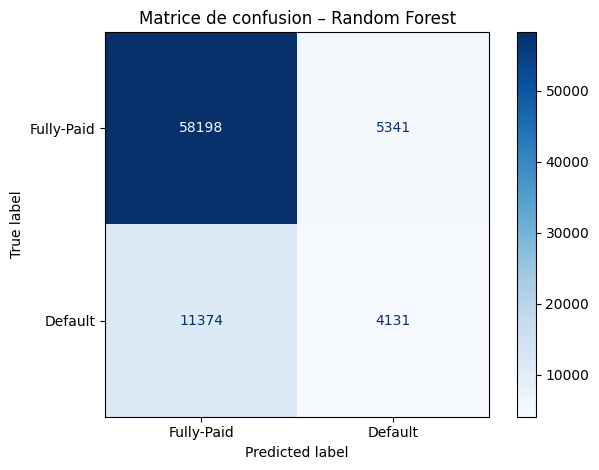

In [43]:
plot_confusion(rf_clf, X_test, y_test, name="Random Forest")

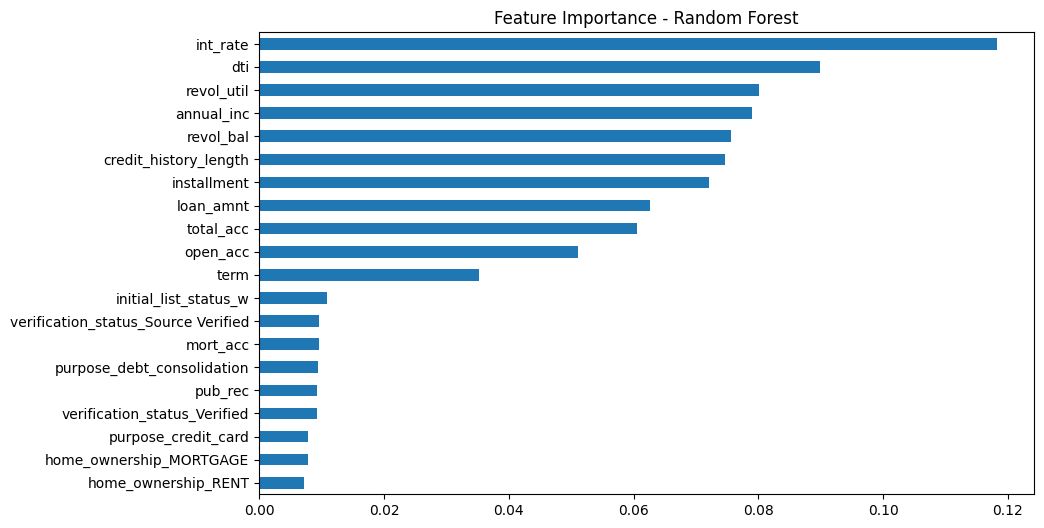

In [44]:
# rf
importances_rf = rf_clf.feature_importances_
feature_names = X.columns.tolist()

# Affichage
pd.Series(importances_rf, index=feature_names).sort_values(ascending=False).head(20).plot.barh(figsize=(10,6))
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [46]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'LGBM': lgbm_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict_proba(X_test)[:, 1]):.3f}")

RANDOM FOREST                  roc_auc_score: 0.712
XGBOOST                        roc_auc_score: 0.723
LGBM                           roc_auc_score: 0.722


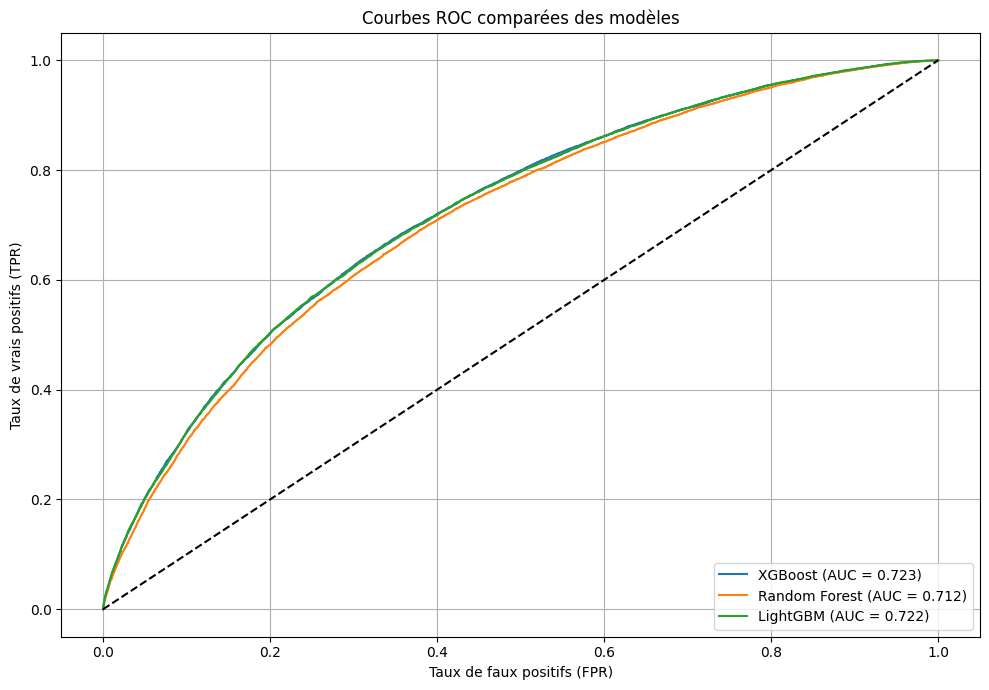

In [45]:
# Prédictions probabilistes
xgb_probs = xgb_clf.predict_proba(X_test)[:, 1]
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
lgbm_probs = lgbm_clf.predict_proba(X_test)[:, 1]

# Courbes ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, lgbm_probs)

# AUCs
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_rf = auc(fpr_rf, tpr_rf)
auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# Tracé ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_lgbm, tpr_lgbm, label=f"LightGBM (AUC = {auc_lgbm:.3f})")

# Diagonale aléatoire
plt.plot([0, 1], [0, 1], 'k--')

plt.title("Courbes ROC comparées des modèles")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


##### Sélection des features finales pour le modèle LGBM

In [24]:
top_12_features = [
    'int_rate', 'annual_inc', 'revol_util', 'loan_amnt', 'dti',
    'credit_history_length', 'installment', 'pub_rec', 'term',
    'home_ownership_MORTGAGE', 'purpose_small_business',
    'verification_status_Source Verified'
]
X_train_selected = X_train[top_12_features]
X_test_selected = X_test[top_12_features] 

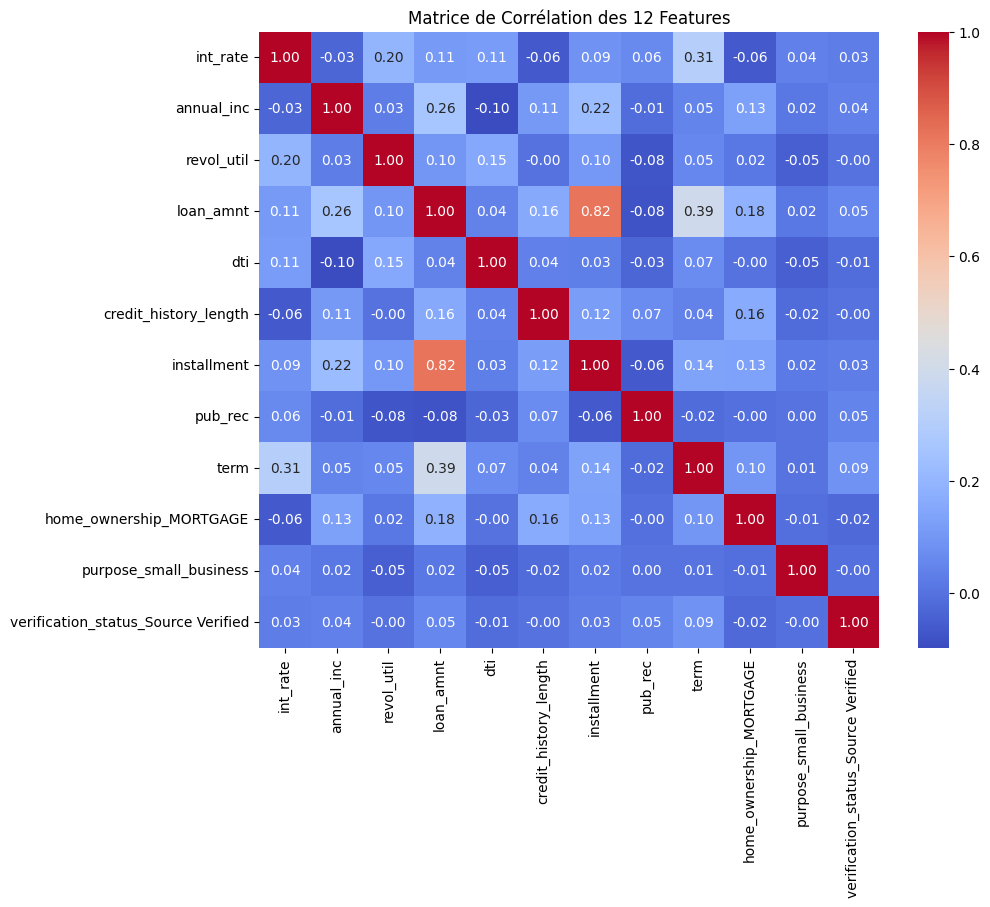

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation des 12 Features")
plt.show()

In [14]:
lgbm_clf = LGBMClassifier(**params_lgbm_optimized)

lgbm_clf.fit(X_train_selected, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 62018, number of negative: 254157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1794
[LightGBM] [Info] Number of data points in the train set: 316175, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(class_weight='balanced', colsample_bytree=0.813,
               learning_rate=0.042, max_depth=5,
               metric=['auc', 'binary_logloss', 'average_precision'],
               n_estimators=700, num_leaves=15, random_state=42,
               reg_alpha=0.293, reg_lambda=0.482, subsample=0.982)

In [15]:
y_train_pred = lgbm_clf.predict(X_train_selected)
y_test_pred = lgbm_clf.predict(X_test_selected)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)


Train Result:
Accuracy Score: 65.74%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.892724      0.322625  0.657443       0.607674       0.780898
recall          0.652231      0.678803  0.657443       0.665517       0.657443
f1-score        0.753759      0.437373  0.657443       0.595566       0.691700
support    254157.000000  62018.000000  0.657443  316175.000000  316175.000000
_______________________________________________
Confusion Matrix: 
 [[165769  88388]
 [ 19920  42098]]

Test Result:
Accuracy Score: 65.21%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.886286      0.314893   0.65213      0.600589      0.774203
recall         0.650734      0.657852   0.65213      0.654293      0.652130
f1-score       0.750461      0.425914   0.65213      0.588

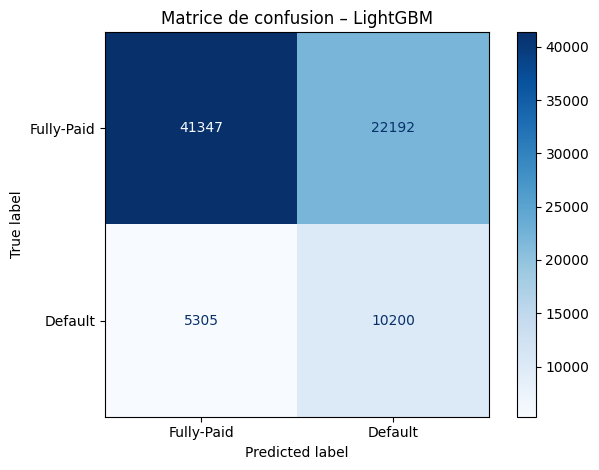

In [16]:
plot_confusion(lgbm_clf, X_test_selected, y_test, name="LightGBM")

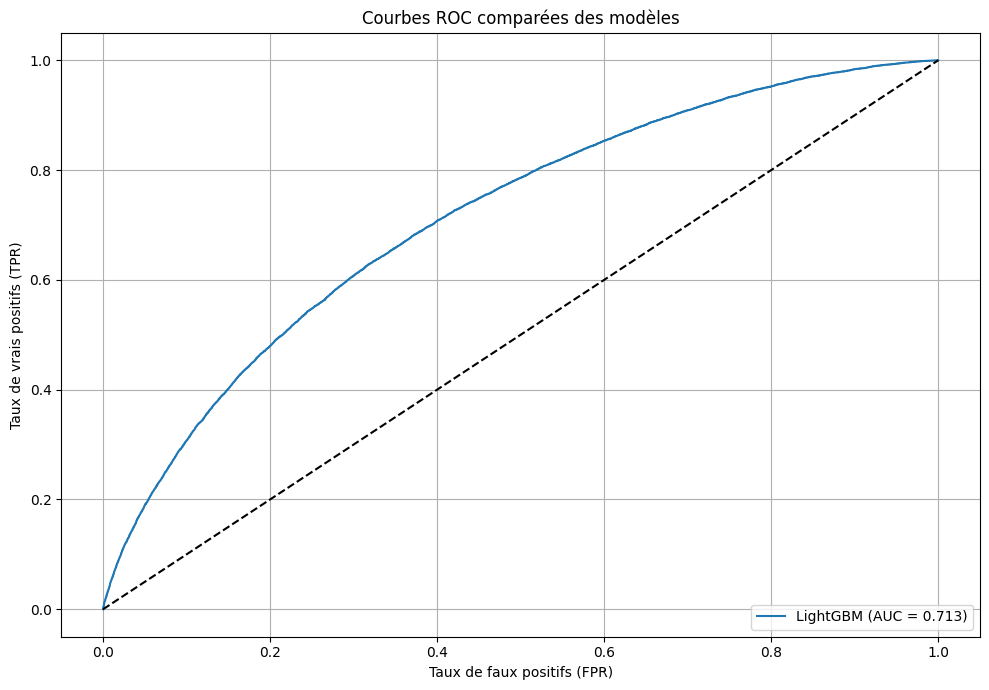

In [ ]:
# Prédictions probabilistes
lgbm_probs = lgbm_clf.predict_proba(X_test_selected)[:, 1]

# Courbes ROC
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, lgbm_probs)

# AUC
auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# Tracé ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_lgbm, tpr_lgbm, label=f"LightGBM (AUC = {auc_lgbm:.3f})")

# Diagonale aléatoire
plt.plot([0, 1], [0, 1], 'k--')

plt.title("Courbes ROC comparées des modèles")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


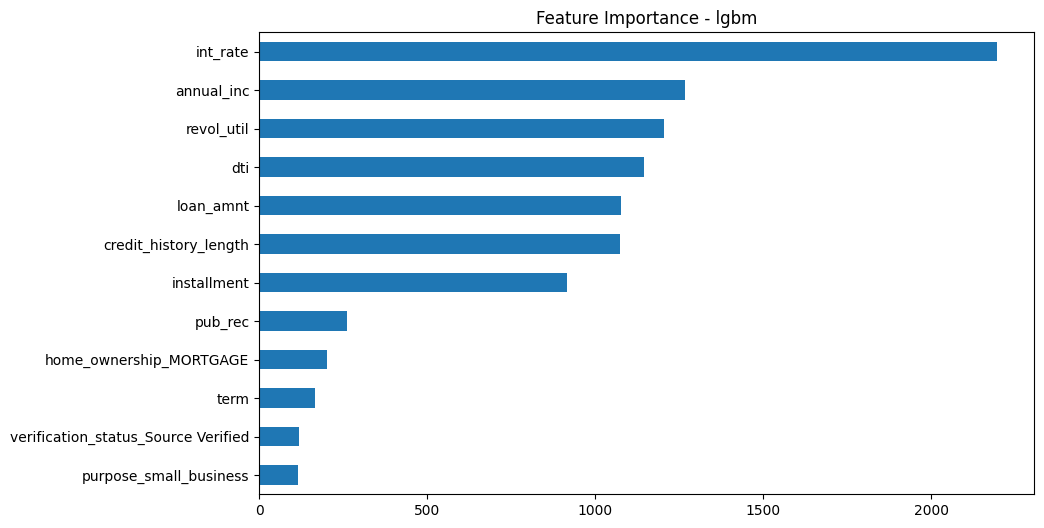

In [18]:
# lgbm
importances_lgbm_ = lgbm_clf.feature_importances_
feature_names_ = X_test_selected.columns.tolist()

# Affichage
pd.Series(importances_lgbm_, index=feature_names_).sort_values(ascending=False).plot.barh(figsize=(10,6))
plt.title("Feature Importance - lgbm")
plt.gca().invert_yaxis()
plt.show()

### Exemple d'utilisation de shap pour comprendre une prédiciton

In [ ]:
import joblib
import pandas as pd
import shap

# Charger ton modèle
model = joblib.load("model/lgbm_clf.pkl")
explainer = shap.Explainer(model)
# Exemple de base (profil favorable)
data = {
    'int_rate': 135.0,
    'annual_inc': 40000,
    'revol_util': 30,
    'loan_amnt': 100000,
    'dti': 50,
    'credit_history_length': 40 * 365,
    'installment': 1000,
    'pub_rec': 0,
    'term': 60,
    'home_ownership_MORTGAGE': 1,
    'purpose_small_business': 0,
    'verification_status_Source Verified': 1
}

df = pd.DataFrame([data])
shap_values = explainer(df)
proba = model.predict_proba(df)[0][1]
print(f"Probabilité de défaut : {round(proba*100, 1)}%")
print(f"Probabilité de FULL : {round(proba*100, 0)}%")

Probabilité de défaut : 11.9%
Probabilité de FULL : 12.0%


int_rate → contribution : -2.337
dti → contribution : 0.386
term → contribution : 0.281


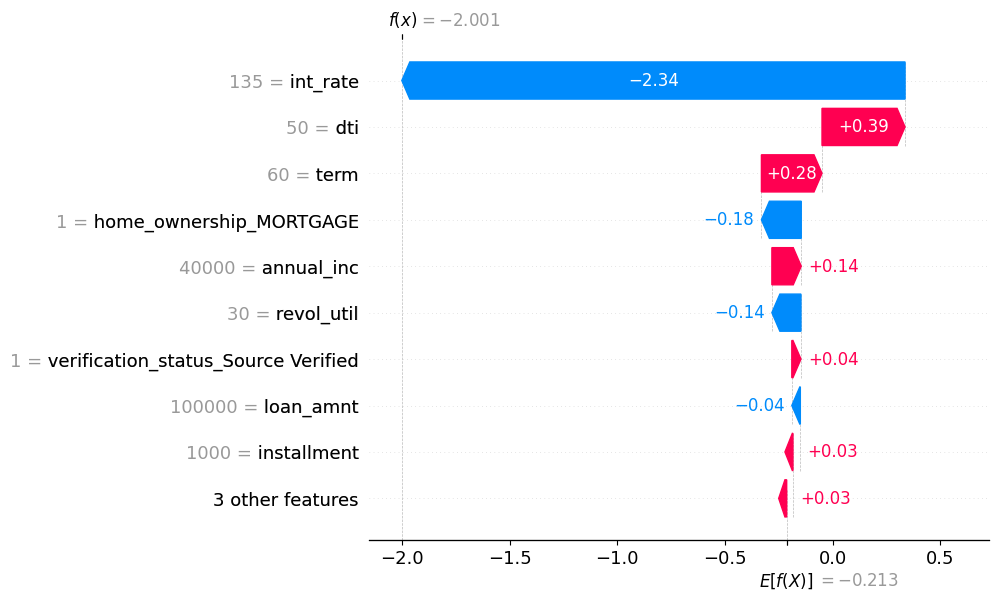

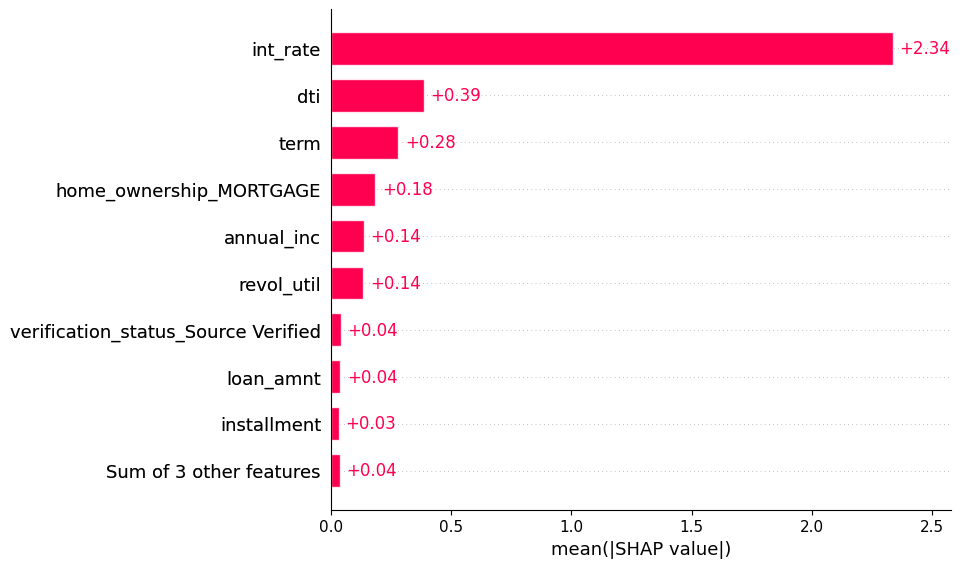

In [41]:
top_features = sorted(
    zip(df.columns, shap_values.values[0]),
    key=lambda x: abs(x[1]),
    reverse=True
)[:3]  # les 3 plus influents

for feature, impact in top_features:
    print(f"{feature} → contribution : {impact:.3f}")
shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values)


In [ ]:

import joblib

# Sauvegarde du modèle LGBM
models_dir = os.path.join('..', 'model')
model_path = os.path.join(models_dir, 'lgbm_clf.pkl')
joblib.dump(lgbm_clf, model_path)